In [1]:
# import requests
from __future__ import print_function    # (at top of module)
import time
import sys
import os
import pandas as pd
import numpy as np
import pickle

PROJ_ROOT = os.path.join(os.getcwd(), os.pardir)

%load_ext watermark
%watermark -a "Thomas Turner" -d -t -v -p numpy,pandas -g

Thomas Turner 04/09/2019 22:24:29 

CPython 3.6.1
IPython 5.3.0

numpy 1.12.1
pandas 0.20.1
Git hash: 61425fff3541881a0b429ec437e7c47b1df757ff


In [2]:
# load environment variables from .env file using dotenv.
# from dotenv import load_dotenv
# dotenv_path = os.path.join(PROJ_ROOT, '.env')
# load_dotenv(dotenv_path)

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)

# import my methods from the source code
%aimport data.spotipy_functions
from data.spotipy_functions import *

In [3]:
# run this to LOAD trackset from file

training_set = pd.read_pickle(os.path.join(PROJ_ROOT,'data','interim','training_set.pkl'))
suggest_set = pd.read_pickle(os.path.join(PROJ_ROOT,'data','interim','track_set.pkl'))

In [5]:
gui_cols = ['artist_name','track_name','tempo','uri','status','P_accept']
training_set[gui_cols].sample(5)

,artist_name,track_name,tempo,uri,status,P_accept
9,Kink,Fish Feeling,122.001,spotify:track:15aioXqs4jOF2yLYFRmrQw,1.0,1.000000
4,Session Victim,Hey Stranger,115.003,spotify:track:72w8SiAqWqjKyo5J0CHtds,-1.0,1.000000
17,Terrence Parker,Love's Got Me High - Marc Romboy's Systematic ...,117.995,spotify:track:6khiPXapuKJt8npyZXhL0Q,-1.0,0.940292
15,Midland,Duster,121.982,spotify:track:3tjjIcYrJ6NJMob4Yoo6hL,-1.0,0.885580
1,Detroit Swindle,Brotherman,122.998,spotify:track:1UdqPzbduC0M7CyHU7r0yT,1.0,1.000000


In [6]:
suggest_set[gui_cols].head()

,artist_name,track_name,tempo,uri,status,P_accept
89,Frits Wentink,Q&A,120.034,spotify:track:5ererkEXPKDyEOsr1eDpst,0.0,0.999979
63,Frits Wentink,Ezzo One,123.981,spotify:track:6QueYGmqeZSukP8aHSI7uK,0.0,0.999833
40,Motor City Drum Ensemble,L.O.V.E. - Radio Edit,119.976,spotify:track:0LQuVyuYMOXnGM3UgLFX37,0.0,0.994795
30,Detroit Swindle,Woman,115.988,spotify:track:69OXSx58gJfQiNhlX38Bzg,0.0,0.992287
11,Laurence Guy,Les mur,122.012,spotify:track:0Bncl216oEGAOIlLv2V7V3,0.0,0.990704


In [7]:
useful_features = ['acousticness','danceability','instrumentalness','energy','speechiness','tempo','valence']
#useful_features = ['instrumentalness','speechiness','tempo','valence']
useful_features = ['energy','speechiness','valence']

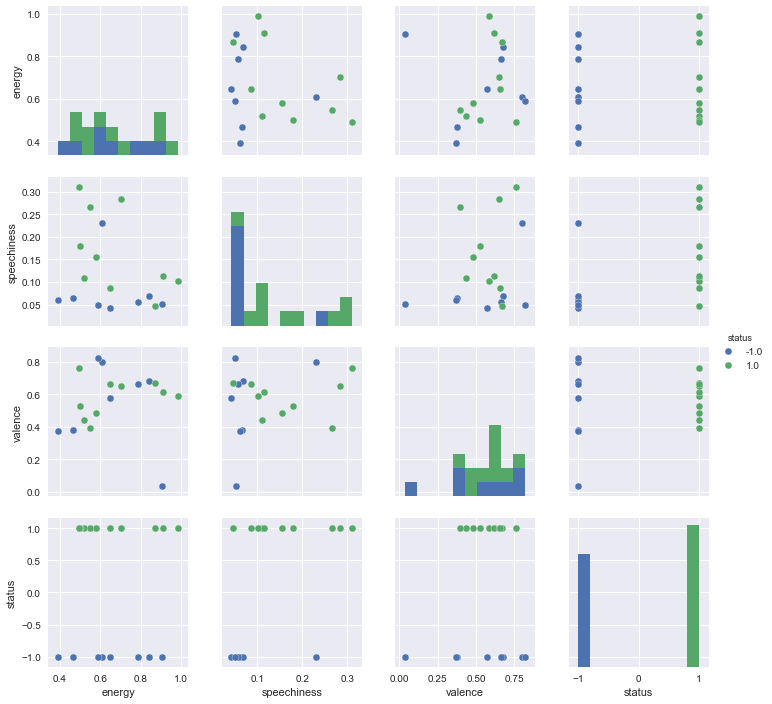

In [8]:
import seaborn as sb
#sb.pairplot(trackset[useful_features + ['P_accept']].dropna())
sb.pairplot(training_set[useful_features + ['status']].dropna(), hue='status')
sb.plt.show()

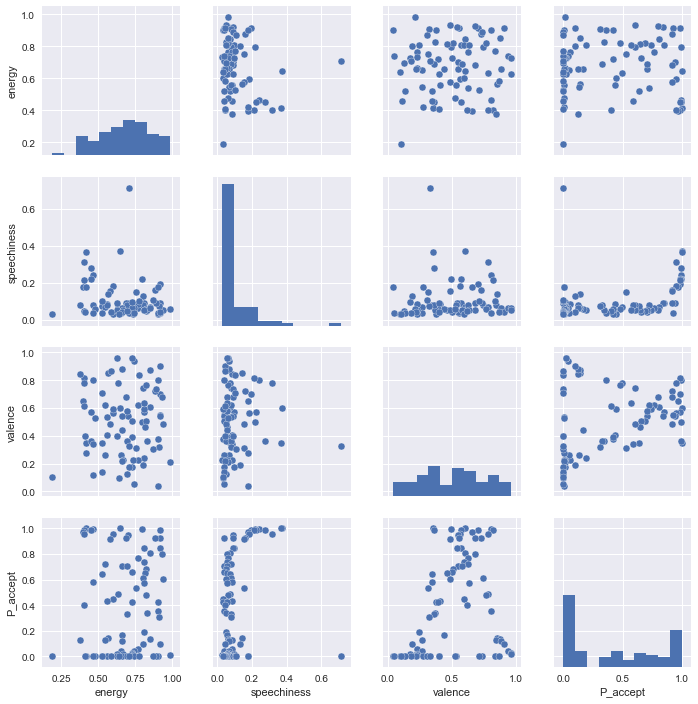

In [9]:
import seaborn as sb
sb.pairplot(suggest_set[useful_features + ['P_accept']].dropna())
sb.plt.show()

# some other stuff...

In [14]:
training_set.tempo.describe()

count     18.000000
mean     119.951833
std        4.757207
min      109.953000
25%      117.984500
50%      120.511000
75%      123.748000
max      127.033000
Name: tempo, dtype: float64